In [1]:
# %pip install numpy
import numpy as np
import findspark
findspark.init()
from pyspark.sql import SparkSession    
import pyspark

In [2]:
spark = SparkSession.builder.getOrCreate()  
spark

In [3]:
sc = spark.sparkContext 

In [11]:
data = np.arange(51)
data

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [ ]:
rdd0 = sc.parallelize(data)
rdd0

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:289

In [13]:
rdd1 = rdd0.map(lambda x:x*2)
rdd1

PythonRDD[1] at RDD at PythonRDD.scala:53

In [14]:
rdd2 = rdd1.map(lambda x:x%4)
rdd2

PythonRDD[2] at RDD at PythonRDD.scala:53

In [15]:
rdd0.getNumPartitions() 

16

In [ ]:
# it took 14 sec
rdd2.collect()

[np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0)]

In [18]:
rdd2.take(4)

[np.int64(0), np.int64(2), np.int64(0), np.int64(2)]

In [19]:
rdd2.cache()

PythonRDD[2] at RDD at PythonRDD.scala:53

In [20]:
rdd3 = rdd2.map(lambda x:x*3)

In [ ]:
# it faster because the data is cached  
rdd3.collect()  

[np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(0)]

<B>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>DAY2>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>></B>

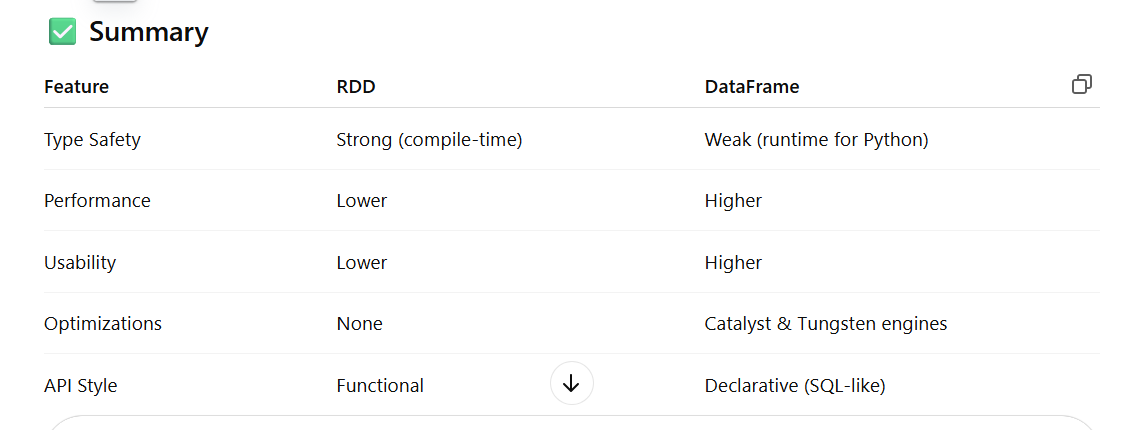

In [23]:
spark

In [26]:
rddFile = sc.textFile("Data/example.txt")
rddFile

Data/example.txt MapPartitionsRDD[8] at textFile at NativeMethodAccessorImpl.java:0

In [ ]:
# any action return the data in a shape of list 
rddFile.collect()

['first line', 'second line', 'third line', 'fourth line']

In [28]:
rddFile2 = sc.textFile("Data/example2.txt")
rddFile2

Data/example2.txt MapPartitionsRDD[10] at textFile at NativeMethodAccessorImpl.java:0

In [29]:
rddFile2.collect()

['first ', 'second line', 'the third line', 'then a fourth line']

In [32]:
rddsecond = rddFile.filter(lambda x: "second" in x) 
rddsecond.collect() 

['second line']

In [33]:
rddline = rddFile.filter(lambda x: "line" in x) 
rddline.collect() 

['first line', 'second line', 'third line', 'fourth line']

In [34]:
rddline.take(2) 

['first line', 'second line']

<B>Map is an example for narrow operations</B>

In [ ]:
def sq(x):
    return x*x


data = np.arange(10)

rdd1 = sc.parallelize(data) 

rdd2 = rdd1.map(sq)

rdd2.take(5)

[np.int64(0), np.int64(1), np.int64(4), np.int64(9), np.int64(16)]

In [37]:
rddFile2 = sc.textFile("Data/example2.txt") 
rddFile.collect()

['first line', 'second line', 'third line', 'fourth line']

In [38]:
rddFile2.map(lambda x: x.split()).collect()

[['first'],
 ['second', 'line'],
 ['the', 'third', 'line'],
 ['then', 'a', 'fourth', 'line']]

In [39]:
rddFile2.flatMap(lambda x: x.split()).collect() 

['first',
 'second',
 'line',
 'the',
 'third',
 'line',
 'then',
 'a',
 'fourth',
 'line']

In [4]:
Names = ['ali','ayman','mariem','mohamed','Soliman','nada','yomna','Adham']

rddNames = sc.parallelize(Names)
rddNames.collect()  

['ali', 'ayman', 'mariem', 'mohamed', 'Soliman', 'nada', 'yomna', 'Adham']

In [5]:
rddNames

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:289

In [7]:
rdd_g = rddNames.groupBy(lambda x: x[0])
rdd_g

PythonRDD[10] at RDD at PythonRDD.scala:53

In [8]:
rdd_g.collect() 

[('y', <pyspark.resultiterable.ResultIterable at 0x20078220150>),
 ('a', <pyspark.resultiterable.ResultIterable at 0x20078200d10>),
 ('m', <pyspark.resultiterable.ResultIterable at 0x200598d7bd0>),
 ('S', <pyspark.resultiterable.ResultIterable at 0x200598deb10>),
 ('n', <pyspark.resultiterable.ResultIterable at 0x20078395910>),
 ('A', <pyspark.resultiterable.ResultIterable at 0x20078396110>)]

In [10]:
first = rdd_g.collect()[0]
first

('y', <pyspark.resultiterable.ResultIterable at 0x20078406250>)

In [11]:
list(first[1])

['yomna']

In [14]:
ll = [1,2,3,4,5]
print(ll)
ll2 = [x**2 for x in ll]
print(ll2)

[1, 2, 3, 4, 5]
[1, 4, 9, 16, 25]


In [16]:
lst_keys = [(1,"A"),(2,"B"),(3,"C"),(4,"D"),(5,"E")]  
lst_keyss=  [(x**2,y) for x,y in lst_keys]  
lst_keyss      

[(1, 'A'), (4, 'B'), (9, 'C'), (16, 'D'), (25, 'E')]

In [17]:
rdd_g = rdd_g.collect() 
rdd_g   

[('y', <pyspark.resultiterable.ResultIterable at 0x20078449110>),
 ('a', <pyspark.resultiterable.ResultIterable at 0x20077c41b90>),
 ('m', <pyspark.resultiterable.ResultIterable at 0x200783a8350>),
 ('S', <pyspark.resultiterable.ResultIterable at 0x20078449e10>),
 ('n', <pyspark.resultiterable.ResultIterable at 0x20078201bd0>),
 ('A', <pyspark.resultiterable.ResultIterable at 0x20078200a90>)]

In [18]:
new_rdd = [(k, list(v)) for k,v in rdd_g]   
new_rdd

[('y', ['yomna']),
 ('a', ['ali', 'ayman']),
 ('m', ['mariem', 'mohamed']),
 ('S', ['Soliman']),
 ('n', ['nada']),
 ('A', ['Adham'])]

In [19]:
rdd = sc.parallelize([('B',5 ),('A',10),('B',15),('D',20),('A',25)])    
rdd

ParallelCollectionRDD[11] at readRDDFromFile at PythonRDD.scala:289

In [20]:
rdd.collect()

[('B', 5), ('A', 10), ('B', 15), ('D', 20), ('A', 25)]

In [21]:
rdd2 = rdd.groupByKey().collect()   
rdd2

[('B', <pyspark.resultiterable.ResultIterable at 0x20078690510>),
 ('D', <pyspark.resultiterable.ResultIterable at 0x2007821df10>),
 ('A', <pyspark.resultiterable.ResultIterable at 0x200786d3990>)]

In [22]:
new_rdd2 = [(k, list(v)) for k,v in rdd2]   
new_rdd2    

[('B', [5, 15]), ('D', [20]), ('A', [10, 25])]

<B>groupby and join is an Example for the Wide Operations </B>

In [23]:
rdd1 = sc.parallelize([('a',1),('b',2)])
rdd2 = sc.parallelize([('a',3),('a',4),('b',5)])

rdd_j = rdd1.join(rdd2)
rdd_j.collect()

[('b', (2, 5)), ('a', (1, 3)), ('a', (1, 4))]

In [24]:
rdd_j2 = rdd1.join(rdd2).collect()  
rdd_j2  

[('b', (2, 5)), ('a', (1, 3)), ('a', (1, 4))]

<B>collect >> is the most expensive action So we can use take </B>

In [27]:
rdd = sc.parallelize(np.arange(15))
print(rdd.collect())
print("-"*50)
rdd.reduce(lambda x,y: x+y)

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14)]
--------------------------------------------------


np.int64(105)

In [29]:
print(rdd.max())
print("__________________")
print(rdd.min())
print("__________________")
print(rdd.mean())
print("__________________")
print(rdd.sum())
print("__________________")
print(rdd.stdev())
print("__________________")

14
__________________
0
__________________
7.0
__________________
105
__________________
4.320493798938574
__________________


<b>Example Shows the Real difference between RDD and df</b>

In [33]:
dataRDD = sc.parallelize([
    ("ali",20),
    ("mariem",30),
    ("ayman",40),
    ("ali",50),
    ("mariem",60),
    ("ayman",70),
    ("ali",80)
])

dataRDD = dataRDD.map(lambda x: (x[0],(x[1],1)))
dataRDD = dataRDD.collect()   
dataRDD

[('ali', (20, 1)),
 ('mariem', (30, 1)),
 ('ayman', (40, 1)),
 ('ali', (50, 1)),
 ('mariem', (60, 1)),
 ('ayman', (70, 1)),
 ('ali', (80, 1))]

In [38]:
dataRDD = sc.parallelize(dataRDD) 

In [39]:
rdd2 =  dataRDD.reduceByKey(lambda x,y: (x[0]+y[0],x[1]+y[1]))  
rdd2 = rdd2.collect()

In [40]:
rdd2

[('ayman', (110, 2)), ('ali', (150, 3)), ('mariem', (90, 2))]

In [ ]:
rdd2 = sc.parallelize(rdd2)

rdd3 = rdd2.map(lambda x: (x[0],x[1][0]/x[1][1]))
rdd3 = rdd3.collect()
rdd3


# so there is many steps just to get the average >>>> so let's try using df

[('ayman', 55.0), ('ali', 50.0), ('mariem', 45.0)]

In [43]:
df = spark.createDataFrame([
    ("ali",20),
    ("mariem",30),
    ("ayman",40),
    ("ali",50),
    ("mariem",60),
    ("ayman",70),
    ("ali",80)
])

df

DataFrame[_1: string, _2: bigint]

In [44]:
df.printSchema()

root
 |-- _1: string (nullable = true)
 |-- _2: long (nullable = true)



In [45]:
df.show()

+------+---+
|    _1| _2|
+------+---+
|   ali| 20|
|mariem| 30|
| ayman| 40|
|   ali| 50|
|mariem| 60|
| ayman| 70|
|   ali| 80|
+------+---+



In [ ]:
# So throw the df with it's schema we can do what we need in an easy way
df.groupBy("_1").avg("_2").show()   

+------+-------+
|    _1|avg(_2)|
+------+-------+
|   ali|   50.0|
|mariem|   45.0|
| ayman|   55.0|
+------+-------+

